# Data Dict Analysis 

A notebook for analysing general informations about the database itself.

Exploring the data from in 2024_06

É possível encontrar os dados em

All data avaiable: https://dados.ons.org.br/dataset/restricao_coff_eolica_usi and https://dados.ons.org.br/dataset/restricao_coff_eolica_detail

In [1]:
import pandas as pd

In [2]:
df_constrainedoff = pd.read_csv('../data_raw/RESTRICAO_COFF_EOLICA_2024_06.csv', delimiter=';')
df_constrainedoff_by_plant= pd.read_csv('../data_raw/RESTRICAO_COFF_EOLICA_DETAIL_2024_06.csv', delimiter=';')

## Dados de Restrição de Operação por Constrained-off de Usinas Eólicas

### **Dataset Description**
The dataset contains **generation data of wind power plants and if they had constrained-off events** with the following columns:

| Column Name                   | Description |
|-------------------------------|-------------|
| `id_subsistema`               | Subsystem id (N, NE, S) |
| `nom_subsistema`              | System name (NORTE, NORDESTE, SUL) |
| `id_estado`                   | State acronym |
| `nom_estado`                  | State name |
| `nom_usina`                   | Name of the Plant or Set of Plants |
| `id_ons`                      | Identifier of the Plant or Group of Plants in the ONS |
| `ceg`                         | Unique Generation Project Code (CEG), established by ANEEL |
| `din_instante`                | Datetime (every 30min) |
| `val_geracao`                 | Generation Value, in MWmed |
| `val_geracaolimitada`         | Limited Generation Value by any restriction, in MWmed |
| `val_disponibilidade`         | Verified Disponibility Value in real time, in MWmed |
| `val_geracaoreferencia`       | Referenced Generation Value (or Estimated), in MWmed |
| `val_geracaoreferenciafinal`  | Final Referenced Generation Value, in MWmed |
| `cod_razaorestricao`          | Restriction Reason Code (REL, CNF, ENE, PAR)  |
| `cod_origemrestricao`         | Restriction Origin Code (LOC, SIS) |


Observations:
- What's MWmed? MWmed: Megawatt médio - 1 MWmed-ano = 8.760 MWh/ano (energia média no intervalo de tempo considerado) (Source: https://www.ons.org.br/sites/multimidia/Documentos%20Compartilhados/dados/dados_relevantes_2010/0901_siglas_unidades.html)
- 2023: 'id_ons' and 'ceg' was added
- 2024: 'PAR' was added as a new domain

In [3]:
display(df_constrainedoff)

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_usina,id_ons,ceg,din_instante,val_geracao,val_geracaolimitada,val_disponibilidade,val_geracaoreferencia,val_geracaoreferenciafinal,cod_razaorestricao,cod_origemrestricao
0,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 00:00:00,0.000,NaN,118.360,11.236,NaN,NaN,NaN
1,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 00:30:00,2.925,NaN,191.261,16.769,NaN,NaN,NaN
2,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 01:00:00,13.215,NaN,324.763,30.001,NaN,NaN,NaN
3,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 01:30:00,5.892,NaN,301.497,23.664,NaN,NaN,NaN
4,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 02:00:00,17.770,NaN,319.832,33.905,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228955,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 21:30:00,23.722,NaN,87.000,21.411,NaN,NaN,NaN
228956,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 22:00:00,24.517,NaN,87.000,19.014,NaN,NaN,NaN
228957,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 22:30:00,27.724,NaN,87.000,28.744,NaN,NaN,NaN
228958,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 23:00:00,32.936,NaN,87.000,37.228,NaN,NaN,NaN


## RESTRIÇÃO DE OPERAÇÃO POR CONSTRAINED-OFF DE USINAS EÓLICAS – DETALHAMENTO POR USINA 

### **Dataset Description**
The dataset contains **generation data of wind power plants** with the following columns:

| Column Name                   | Description |
|-------------------------------|-------------|
| `id_subsistema`               | Subsystem id (N, S, L, O) |
| `id_estado`                   | State acronym |
| `nom_modalidadeoperacao `     | Plant Operation Mode |
| `nom_conjuntousina`           | Name of the Plant Set (only for plants with Type II-C operating mode) |
| `nom_usina`                   | Plant's name |
| `id_ons`                      | Identifier of the Plant or Group of Plants in the ONS |
| `ceg`                         | Unique Generation Project Code (CEG), established by ANEEL |
| `din_instante`                | Datetime (every 30min) |
| `val_ventoverificado`         | Verified wind, in m3/s |
| `flg_dadoventoinvalido `      | Indication of invalid wind data. The data is considered invalid (flag = 1) when there is a failure in the measurement received by the ONS Supervision and Control System for more than 6 minutes within the corresponding half-hour. |
| `val_geracaoestimada`         | Value of the estimated generation of the plant, in MWmed, obtained from the verified wind data and the wind x power curve or, if the curve is unavailable, from the verified generation history. |
| `val_geracaoverificada`       | Verified Generation Value, in MWmed |

Observations: 

- Detalhes das Modalidades de Operação de Usinas
    - Tipo I: Programação e despacho centralizados. 
    - Tipos II-A, II-B, II-C: Programação centralizada, mas o despacho pode ser centralizado (II-A) ou não centralizado (II-B e II-C). 
    - Tipo III: Programação e despacho não centralizados. 

In [4]:
display(df_constrainedoff_by_plant)

,id_subsistema,id_estado,nom_modalidadeoperacao,nom_conjuntousina,nom_usina,id_ons,ceg,din_instante,val_ventoverificado,flg_dadoventoinvalido,val_geracaoestimada,val_geracaoverificada
0,N,MA,Tipo II-C,Conj. Paulino Neves,Delta 3 I,MAEDT1,EOL.CV.MA.033682-3.01,2024-06-01 00:00:00,2.038,0.0,0.383,0.000
1,N,MA,Tipo II-C,Conj. Paulino Neves,Delta 3 II,MAEDT2,EOL.CV.MA.033683-1.01,2024-06-01 00:00:00,2.680,0.0,0.801,0.000
2,N,MA,Tipo II-C,Conj. Paulino Neves,Delta 3 III,MAEDT3,EOL.CV.MA.033684-0.01,2024-06-01 00:00:00,2.670,0.0,0.560,0.000
3,N,MA,Tipo II-C,Conj. Paulino Neves,Delta 3 IV,MAEDT4,EOL.CV.MA.033685-8.01,2024-06-01 00:00:00,2.418,0.0,1.379,0.000
4,N,MA,Tipo II-C,Conj. Paulino Neves,Delta 3 V,MAEDT5,EOL.CV.MA.033675-0.01,2024-06-01 00:00:00,2.567,0.0,1.443,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
1398283,S,SC,Tipo II-C,Conj. Água Doce,Cruz Alta,SCECAL,EOL.CV.SC.029070-0.01,2024-06-30 23:30:00,3.715,1.0,0.000,0.023
1398284,S,SC,Tipo II-C,Conj. Bom Jardim,Púlpito,SCUPPT,EOL.CV.SC.029051-3.01,2024-06-30 23:30:00,7.382,0.0,11.008,9.334
1398285,S,SC,Tipo II-C,Conj. Bom Jardim,Rio do Ouro,SCUROU,EOL.CV.SC.029055-6.01,2024-06-30 23:30:00,7.378,0.0,9.796,8.920
1398286,S,SC,Tipo II-C,Conj. Água Doce,Salto,SCESTO,EOL.CV.SC.029056-4.01,2024-06-30 23:30:00,3.715,1.0,0.000,0.006


In [4]:
# Converter 'nom_usina' para maiúsculas em ambas as bases
df_constrainedoff['nom_usina'] = df_constrainedoff['nom_usina'].str.upper()
df_constrainedoff_by_plant['nom_conjuntousina'] = df_constrainedoff_by_plant['nom_conjuntousina'].str.upper()

df_constrainedoff_by_plant.head()

,id_subsistema,id_estado,nom_modalidadeoperacao,nom_conjuntousina,nom_usina,id_ons,ceg,din_instante,val_ventoverificado,flg_dadoventoinvalido,val_geracaoestimada,val_geracaoverificada
0,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 3 I,MAEDT1,EOL.CV.MA.033682-3.01,2024-06-01 00:00:00,2.038,0.0,0.383,0.0
1,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 3 II,MAEDT2,EOL.CV.MA.033683-1.01,2024-06-01 00:00:00,2.680,0.0,0.801,0.0
2,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 3 III,MAEDT3,EOL.CV.MA.033684-0.01,2024-06-01 00:00:00,2.670,0.0,0.560,0.0
3,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 3 IV,MAEDT4,EOL.CV.MA.033685-8.01,2024-06-01 00:00:00,2.418,0.0,1.379,0.0
4,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 3 V,MAEDT5,EOL.CV.MA.033675-0.01,2024-06-01 00:00:00,2.567,0.0,1.443,0.0


## General informations about the database 

Using functions info() and describe() to catch general informations about the data

In [5]:
df_constrainedoff.info()
df_constrainedoff.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228960 entries, 0 to 228959
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_subsistema               228960 non-null  object 
 1   nom_subsistema              228960 non-null  object 
 2   id_estado                   228960 non-null  object 
 3   nom_estado                  228960 non-null  object 
 4   nom_usina                   228960 non-null  object 
 5   id_ons                      228960 non-null  object 
 6   ceg                         228960 non-null  object 
 7   din_instante                228960 non-null  object 
 8   val_geracao                 228960 non-null  float64
 9   val_geracaolimitada         53673 non-null   float64
 10  val_disponibilidade         228960 non-null  float64
 11  val_geracaoreferencia       228960 non-null  float64
 12  val_geracaoreferenciafinal  2522 non-null    float64
 13  cod_razaorestr

,val_geracao,val_geracaolimitada,val_disponibilidade,val_geracaoreferencia,val_geracaoreferenciafinal
count,228960.000000,53673.000000,228960.000000,228960.000000,2522.000000
mean,82.132092,68.161052,153.456456,75.145526,48.884427
std,94.381027,86.359749,130.492057,84.341511,73.735810
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.793750,8.900000,63.900000,17.737750,0.000000
50%,48.841500,38.000000,111.047000,44.779000,14.819000
75%,110.349000,92.433000,207.013250,102.286000,70.381250
max,687.337000,671.200000,666.999000,577.399000,471.440000


In [6]:
df_constrainedoff_by_plant.info()
df_constrainedoff_by_plant.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398288 entries, 0 to 1398287
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   id_subsistema           1398288 non-null  object 
 1   id_estado               1398288 non-null  object 
 2   nom_modalidadeoperacao  1398288 non-null  object 
 3   nom_conjuntousina       1382448 non-null  object 
 4   nom_usina               1398288 non-null  object 
 5   id_ons                  1398288 non-null  object 
 6   ceg                     1398288 non-null  object 
 7   din_instante            1398288 non-null  object 
 8   val_ventoverificado     1398288 non-null  float64
 9   flg_dadoventoinvalido   1398288 non-null  float64
 10  val_geracaoestimada     1398288 non-null  float64
 11  val_geracaoverificada   1398288 non-null  float64
dtypes: float64(4), object(8)
memory usage: 128.0+ MB


,val_ventoverificado,flg_dadoventoinvalido,val_geracaoestimada,val_geracaoverificada
count,1.398288e+06,1.398288e+06,1.398288e+06,1.398288e+06
mean,8.072121e+00,2.142792e-01,1.230456e+01,1.334290e+01
std,8.355202e+00,4.103215e-01,1.185488e+01,1.161522e+01
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,0.000000e+00,1.734000e+00,4.431000e+00
50%,7.812000e+00,0.000000e+00,9.535000e+00,1.070800e+01
75%,9.713000e+00,0.000000e+00,1.980500e+01,2.017900e+01
max,2.410000e+02,1.000000e+00,7.735000e+01,2.770000e+02


# Plants caracteristcs

Using df_constrainedoff to identify all the wind power plants in the dataset

In [27]:
# Getting all the unique code of name 
df_constrainedoff_names = df_constrainedoff['nom_usina'].unique()
df_constrainedoff_names 

# Save as a txt file
with open('../extractions/nome-usinas.txt', 'w') as f:
    for name in df_constrainedoff_names:
        f.write(f"{name}\n")

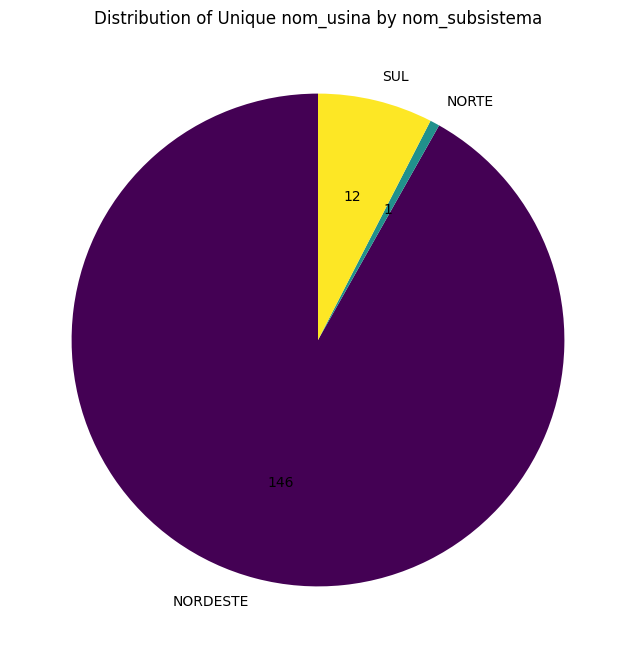

In [ ]:
import matplotlib.pyplot as plt

# Group data by nom_subsistema and count unique occurrences of nom_usina
grouped_data = df_constrainedoff.groupby('nom_subsistema')['nom_usina'].nunique()

# Create a pie chart with quantities
plt.figure(figsize=(8, 8))
grouped_data.plot.pie(
    autopct=lambda p: f'{int(p * sum(grouped_data) / 100)}',  
    startangle=90,
    cmap='viridis'
)
plt.title('Distribution of Unique nom_usina by nom_subsistema')
plt.ylabel('')  
plt.show()

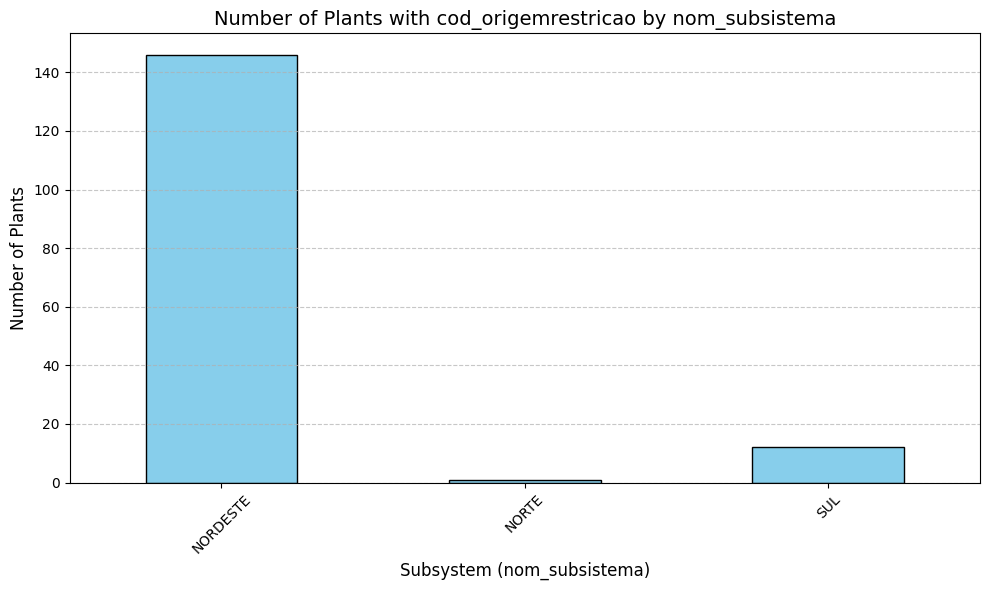

In [34]:
import matplotlib.pyplot as plt

# Filter data where cod_origemrestricao is not null
data_with_restriction = df_constrainedoff[df_constrainedoff['cod_origemrestricao'].notnull()]

# Group by nom_subsistema and count unique nom_usina
grouped_data = data_with_restriction.groupby('nom_subsistema')['nom_usina'].nunique()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Plants with cod_origemrestricao by nom_subsistema', fontsize=14)
plt.xlabel('Subsystem (nom_subsistema)', fontsize=12)
plt.ylabel('Number of Plants', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# MA Data
Analysing only Paulino Neves

In [7]:
df_constrainedoff_ma = df_constrainedoff[df_constrainedoff['id_estado'] == 'MA']
df_constrainedoff_by_plant_ma = df_constrainedoff_by_plant[df_constrainedoff_by_plant['id_estado'] == 'MA']

# display(df_constrainedoff_ma)
# display(df_constrainedoff_by_plant_ma)

Na análise abaixo, qualquer dado que é analisado limitando algum Delta, o valor das linhas é de 1440, que é igual ao valor de linhas em df_constrainedoff_ma

21600/1440 = 15 usinas

Ao utilizar unique para listar todas as nom_usinas, tivemos o total de 15 usinas listadas
['Delta 3 I' 'Delta 3 II' 'Delta 3 III' 'Delta 3 IV' 'Delta 3 V'
 'Delta 3 VI' 'Delta 3 VII' 'Delta 3 VIII' 'Delta 5 I' 'Delta 5 II'
 'Delta 6 I' 'Delta 6 II' 'Delta 7 I' 'Delta 7 II' 'Delta 8 I']

 Minha suposição é que nom_conjuntousina é o correspondente ao nome do cluster, já nom_usina são correspondentes aos nomes de registro/parque que compõem o cluster como um todo

In [8]:
df_delta = df_constrainedoff_by_plant[(df_constrainedoff_by_plant['nom_conjuntousina'] == 'CONJ. PAULINO NEVES') & (df_constrainedoff_by_plant['nom_usina'] == 'Delta 8 I')]

display(df_delta)

,id_subsistema,id_estado,nom_modalidadeoperacao,nom_conjuntousina,nom_usina,id_ons,ceg,din_instante,val_ventoverificado,flg_dadoventoinvalido,val_geracaoestimada,val_geracaoverificada
14,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-01 00:00:00,2.185,0.0,0.695,0.000
979,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-01 00:30:00,2.996,0.0,1.344,0.000
1944,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-01 01:00:00,4.180,0.0,3.013,0.067
2909,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-01 01:30:00,3.787,0.0,2.338,0.000
3874,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-01 02:00:00,4.438,0.0,3.536,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...
1393432,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-30 21:30:00,7.312,0.0,14.781,11.141
1394406,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-30 22:00:00,7.621,0.0,16.486,10.191
1395380,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-30 22:30:00,7.709,0.0,16.976,9.742
1396354,N,MA,Tipo II-C,CONJ. PAULINO NEVES,Delta 8 I,MAED8I,EOL.CV.MA.040574-4.01,2024-06-30 23:00:00,7.555,0.0,16.121,9.088


In [7]:
nom_usinas_unicas = df_constrainedoff_by_plant_ma['nom_usina'].unique()
print(nom_usinas_unicas)

['Delta 3 I' 'Delta 3 II' 'Delta 3 III' 'Delta 3 IV' 'Delta 3 V'
 'Delta 3 VI' 'Delta 3 VII' 'Delta 3 VIII' 'Delta 5 I' 'Delta 5 II'
 'Delta 6 I' 'Delta 6 II' 'Delta 7 I' 'Delta 7 II' 'Delta 8 I']


# Limitation Explore
- 53673 linhas de código em que há clusters que sofreram algum tipo de restrição
- As restrições são classificadas como ENE, REL ou CNF
- Quando há restrição documentada, não possuem lacunas em relação a 'val_geracaolimitada'

In [9]:
# Verificar onde o cod_restricao não é NULL
data_with_restrition = df_constrainedoff[df_constrainedoff['cod_razaorestricao'].notnull()]
data_with_restrition

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_usina,id_ons,ceg,din_instante,val_geracao,val_geracaolimitada,val_disponibilidade,val_geracaoreferencia,val_geracaoreferenciafinal,cod_razaorestricao,cod_origemrestricao
14,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 07:00:00,63.053,85.396,369.759,123.490,NaN,ENE,SIS
15,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 07:30:00,63.935,59.700,370.050,129.143,NaN,ENE,SIS
16,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 08:00:00,55.850,55.333,372.500,250.838,NaN,ENE,SIS
17,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 08:30:00,49.878,54.933,373.981,336.761,NaN,ENE,SIS
18,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 09:00:00,46.990,53.933,374.137,325.520,NaN,ENE,SIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228937,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 12:30:00,50.611,53.000,88.500,78.800,NaN,ENE,SIS
228938,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 13:00:00,49.010,53.000,88.500,64.973,NaN,ENE,SIS
228939,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 13:30:00,45.911,53.000,88.500,56.638,NaN,ENE,SIS
228940,S,SUL,SC,SANTA CATARINA,CONJ. BOM JARDIM,CJU_SCCEBJ,-,2024-06-30 14:00:00,34.394,53.000,88.500,33.404,NaN,ENE,SIS


In [13]:
data_with_restrition['cod_razaorestricao'].unique()

array(['ENE', 'REL', 'CNF'], dtype=object)

In [10]:
# Verificar quantas linhas possuem nom_usina = 'CONJ. PAULINO NEVES'
data_with_restrition[data_with_restrition['nom_usina'] == 'CONJ. PAULINO NEVES']

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_usina,id_ons,ceg,din_instante,val_geracao,val_geracaolimitada,val_disponibilidade,val_geracaoreferencia,val_geracaoreferenciafinal,cod_razaorestricao,cod_origemrestricao
14,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 07:00:00,63.053,85.396,369.759,123.490,NaN,ENE,SIS
15,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 07:30:00,63.935,59.700,370.050,129.143,NaN,ENE,SIS
16,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 08:00:00,55.850,55.333,372.500,250.838,NaN,ENE,SIS
17,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 08:30:00,49.878,54.933,373.981,336.761,NaN,ENE,SIS
18,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-01 09:00:00,46.990,53.933,374.137,325.520,NaN,ENE,SIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-30 12:30:00,31.774,41.000,332.427,369.907,NaN,ENE,SIS
1418,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-30 13:00:00,31.742,41.000,332.760,366.804,NaN,ENE,SIS
1419,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-30 13:30:00,32.293,41.000,332.299,346.869,NaN,ENE,SIS
1420,N,NORTE,MA,MARANHAO,CONJ. PAULINO NEVES,CJU_MAPLN,-,2024-06-30 14:00:00,54.617,68.000,346.190,325.784,NaN,ENE,SIS


In [13]:
data_with_restrition[data_with_restrition['val_geracaoreferenciafinal'].notnull()]

,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_usina,id_ons,ceg,din_instante,val_geracao,val_geracaolimitada,val_disponibilidade,val_geracaoreferencia,val_geracaoreferenciafinal,cod_razaorestricao,cod_origemrestricao
1478,NE,NORDESTE,BA,BAHIA,CONJ. ABIL I,CJU_BAABL,-,2024-06-01 19:00:00,21.374,26.723,68.100,61.667,0.000,REL,SIS
1479,NE,NORDESTE,BA,BAHIA,CONJ. ABIL I,CJU_BAABL,-,2024-06-01 19:30:00,0.275,0.000,51.198,66.335,51.198,REL,SIS
1480,NE,NORDESTE,BA,BAHIA,CONJ. ABIL I,CJU_BAABL,-,2024-06-01 20:00:00,0.000,0.000,50.700,45.400,45.400,REL,SIS
1481,NE,NORDESTE,BA,BAHIA,CONJ. ABIL I,CJU_BAABL,-,2024-06-01 20:30:00,0.201,0.233,50.700,66.756,0.000,REL,SIS
1482,NE,NORDESTE,BA,BAHIA,CONJ. ABIL I,CJU_BAABL,-,2024-06-01 21:00:00,14.208,24.233,50.700,64.151,0.000,REL,SIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,NE,NORDESTE,RN,RIO GRANDE DO NORTE,REI DOS VENTOS 3,RNUERT,EOL.CV.RN.030417-4.01,2024-06-21 10:00:00,8.949,11.000,52.173,0.000,0.000,REL,SIS
211221,NE,NORDESTE,RN,RIO GRANDE DO NORTE,REI DOS VENTOS 3,RNUERT,EOL.CV.RN.030417-4.01,2024-06-21 10:30:00,8.753,11.000,51.437,0.000,0.000,REL,SIS
211222,NE,NORDESTE,RN,RIO GRANDE DO NORTE,REI DOS VENTOS 3,RNUERT,EOL.CV.RN.030417-4.01,2024-06-21 11:00:00,8.661,11.000,51.993,0.000,0.000,REL,SIS
211223,NE,NORDESTE,RN,RIO GRANDE DO NORTE,REI DOS VENTOS 3,RNUERT,EOL.CV.RN.030417-4.01,2024-06-21 11:30:00,8.579,11.000,51.400,0.000,0.000,REL,SIS
